In [ ]:
'''Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности'''

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [74]:
#Задание 1 
df_water = pd.read_csv('water.csv', sep=',', quoting=3)# подскажите, пожалуйста, что это quoting и зачем он нужен?
df_water

,"""","""""location""""","""""town""""","""""mortality""""","""""hardness"""""""
0,"""1","""""South""""","""""Bath""""",1247,"105"""
1,"""2","""""North""""","""""Birkenhead""""",1668,"17"""
2,"""3","""""South""""","""""Birmingham""""",1466,"5"""
3,"""4","""""North""""","""""Blackburn""""",1800,"14"""
4,"""5","""""North""""","""""Blackpool""""",1609,"18"""
...,...,...,...,...,...
56,"""57","""""South""""","""""Walsall""""",1527,"60"""
57,"""58","""""South""""","""""West Bromwich""""",1627,"53"""
58,"""59","""""South""""","""""West Ham""""",1486,"122"""
59,"""60","""""South""""","""""Wolverhampton""""",1485,"81"""


In [75]:
df_water.drop('"', axis=1, inplace=True)

In [76]:
df_water.columns = ['location', 'town', 'mortality','hardness']

In [77]:
df_water['town']=df_water['town'].str.replace('""','')
df_water['location']=df_water['location'].str.replace('""','')# есть ли более оптимальный способ?
df_water['hardness']=df_water['hardness'].str.replace('"','')

In [78]:
df_water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [86]:
df_water['hardness'] = pd.to_numeric(df_water['hardness'])

In [87]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [88]:
df_water.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

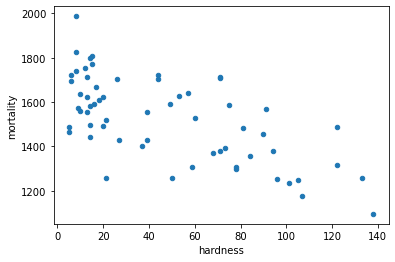

In [89]:
#2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
df_water.plot(kind='scatter', x='hardness', y='mortality')# судя по графику связь есть

In [90]:
df_water[['hardness', 'mortality']].corr(method='spearman')# высокие значения корреляции также подтверждают связь

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [91]:
df_water[['hardness', 'mortality']].corr()# корреляция по Пирсону

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [93]:
X = df_water[['hardness']]# тут имеет значение, что буква X заглавная?
y = df_water['mortality']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [97]:
X_train.shape

(42, 1)

In [98]:
y_train.shape

(42,)

In [99]:
model = LinearRegression()
model.fit(X, y) 

LinearRegression()

In [100]:
model.coef_

array([-3.22609161])

In [101]:
model.intercept_

1676.3556007011584

In [102]:
y_pred = model.predict(X_test)
y_pred

array([1337.61598205, 1644.09468464, 1631.19031821, 1534.40757003,
       1424.72045541, 1611.83376858, 1247.28541707, 1434.39873023,
       1608.60767697, 1656.99905106, 1486.01619593, 1415.0421806 ,
       1550.53802806, 1631.19031821, 1447.30309666, 1550.53802806,
       1644.09468464, 1627.96422661, 1350.52034847])

In [103]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации и его значение говорит о хорошей применимости модели

0.5082573988571222

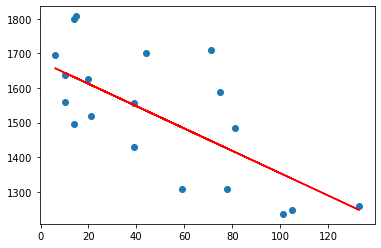

In [104]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')#  c='r' что это значит?

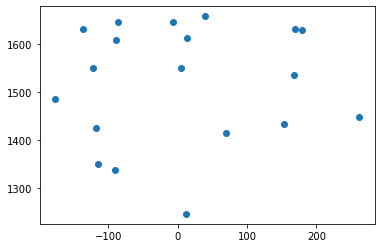

In [106]:
plt.scatter(y_test-y_pred, y_pred)# отсутствие патернов в остатках говорит о хорошей применимости модели

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

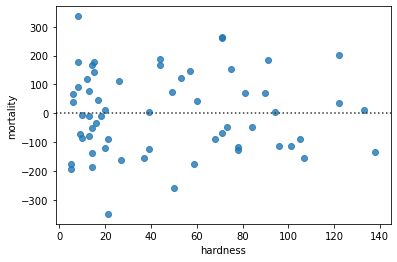

In [108]:
 sns.residplot (X, y)

In [ ]:
"""По результатам построения графикиов, расчета корреляции по Спирмену и Пирсону и построения линейной регресии, можно сделать вывод, что связь есть и она линейная"""

In [112]:
#3 Задание.Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
S_water = df_water.loc[df_water['location']=='South']

In [114]:
N_water = df_water.loc[df_water['location']=='North']

In [115]:
X_s = S_water[['hardness']]
y_s = S_water['mortality']

In [116]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.30, random_state=42)

In [117]:
X_s_train.shape

(18, 1)

In [118]:
y_s_train.shape

(18,)

In [122]:
model_s = LinearRegression()
model_s.fit(X_s, y_s) 

LinearRegression()

In [123]:
model_s.coef_

array([-2.09271845])

In [124]:
model_s.intercept_

1522.8150485436895

In [125]:
y_pred_s = model_s.predict(X_s_test)
y_pred_s

array([1267.50339806, 1512.35145631, 1303.07961165, 1267.50339806,
       1445.38446602, 1478.86796117, 1399.34466019, 1512.35145631])

In [126]:
model_s.score(X_s_test, y_s_test)

-0.6137833389285872

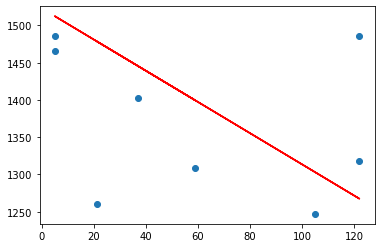

In [138]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_pred_s, c='r')

In [128]:
X_n = N_water[['hardness']]
y_n = N_water['mortality']

In [129]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.30, random_state=42)

In [130]:
X_n_train.shape

(24, 1)

In [131]:
y_n_train.shape

(24,)

In [132]:
model_n = LinearRegression()
model_n.fit(X_n, y_n) 

LinearRegression()

In [133]:
model_n.coef_

array([-1.93134215])

In [134]:
model_n.intercept_

1692.312801433099

In [135]:
y_pred_n = model_n.predict(X_n_test)
y_pred_n

array([1676.86206421, 1674.93072206, 1665.2740113 , 1680.72474852,
       1661.41132699, 1555.18750861, 1607.33374673, 1676.86206421,
       1616.99045749, 1663.34266915, 1616.99045749])

In [136]:
model_n.score(X_n_test, y_n_test)

0.026369710023270487

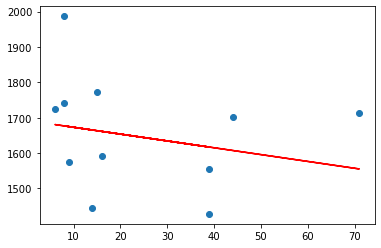

In [139]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_pred_n, c='r')

In [ ]:
"""Вид линейной зависимости сохраняется, но коэффициенты регрессии  разные в зависимости от части страны."""